In [1]:
from keras.datasets import mnist
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras.callbacks import TensorBoard
import numpy as np
from keras import backend as K
import matplotlib.pyplot as plt
from keras.models import load_model
from keras.models import model_from_json


input_encoder = Input(shape=(28, 28, 1))
input_decoder = Input(shape=(4, 4, 4))

with open('decoder.json', 'r') as f:
    decoder = model_from_json(f.read())
    decoder.load_weights("decoder.h5")
    
with open('encoder.json', 'r') as f:
    encoder = model_from_json(f.read())
    encoder.load_weights("encoder.h5")
    
with open('autoencoder.json', 'r') as f:
    autoencoder = model_from_json(f.read())
    autoencoder.load_weights("autoencoder.h5")
    

/home/ganimedes/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


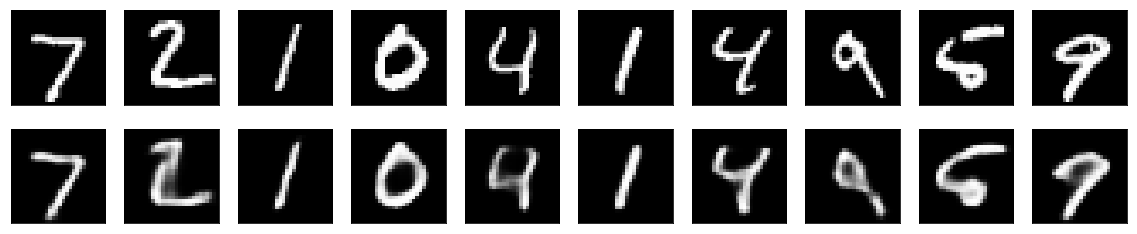

In [2]:
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  # adapt this if using `channels_first` image data format
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))  # adapt this if using `channels_first` image data format

decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i + n + 1)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [3]:
print(x_train.shape)

(60000, 28, 28, 1)


In [4]:
data_x = encoder.predict(x_train)
print(data_x.shape)

(60000, 4, 4, 4)


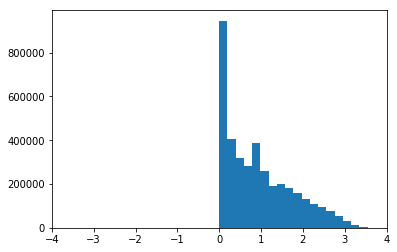

In [5]:
plt.xlim(-4, 4)
plt.hist(data_x.reshape(60000 * 64), normed=False, bins=20)
plt.show()

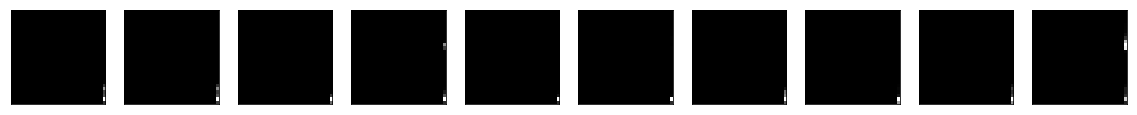

0 [D loss: 1.018556, acc.: 24.22%] [G loss: 1.057106]
1 [D loss: 0.704036, acc.: 48.44%] [G loss: 1.488848]
2 [D loss: 0.540534, acc.: 99.22%] [G loss: 1.774283]
3 [D loss: 0.452614, acc.: 100.00%] [G loss: 1.938403]
4 [D loss: 0.426809, acc.: 99.22%] [G loss: 2.011720]
5 [D loss: 0.414753, acc.: 100.00%] [G loss: 2.037617]
6 [D loss: 0.440183, acc.: 100.00%] [G loss: 2.054431]
7 [D loss: 0.518909, acc.: 84.38%] [G loss: 2.017253]
8 [D loss: 0.642538, acc.: 60.16%] [G loss: 1.902430]
9 [D loss: 0.836289, acc.: 34.38%] [G loss: 1.692941]
10 [D loss: 1.017209, acc.: 12.50%] [G loss: 1.424200]
11 [D loss: 1.107507, acc.: 0.00%] [G loss: 1.201117]
12 [D loss: 1.077513, acc.: 0.00%] [G loss: 1.052201]
13 [D loss: 0.993814, acc.: 0.00%] [G loss: 1.014503]
14 [D loss: 0.870665, acc.: 1.56%] [G loss: 1.029813]
15 [D loss: 0.838287, acc.: 6.25%] [G loss: 0.997238]
16 [D loss: 0.830454, acc.: 17.97%] [G loss: 0.944159]
17 [D loss: 0.829636, acc.: 25.78%] [G loss: 0.892797]
18 [D loss: 0.829426, 

150 [D loss: 0.552937, acc.: 53.91%] [G loss: 0.898028]
151 [D loss: 0.632694, acc.: 41.41%] [G loss: 0.854060]
152 [D loss: 0.725437, acc.: 38.28%] [G loss: 0.832810]
153 [D loss: 0.822768, acc.: 29.69%] [G loss: 0.840971]
154 [D loss: 0.804990, acc.: 25.78%] [G loss: 0.854145]
155 [D loss: 0.806663, acc.: 22.66%] [G loss: 0.842763]
156 [D loss: 0.778141, acc.: 21.88%] [G loss: 0.871910]
157 [D loss: 0.711554, acc.: 28.12%] [G loss: 0.916811]
158 [D loss: 0.650098, acc.: 77.34%] [G loss: 0.941954]
159 [D loss: 0.613169, acc.: 78.12%] [G loss: 0.960530]
160 [D loss: 0.561643, acc.: 82.81%] [G loss: 0.927229]
161 [D loss: 0.599570, acc.: 60.16%] [G loss: 0.828614]
162 [D loss: 0.629488, acc.: 46.88%] [G loss: 0.751616]
163 [D loss: 0.702738, acc.: 40.62%] [G loss: 0.727281]
164 [D loss: 0.727115, acc.: 42.97%] [G loss: 0.708739]
165 [D loss: 0.730618, acc.: 40.62%] [G loss: 0.717139]
166 [D loss: 0.690988, acc.: 46.88%] [G loss: 0.725424]
167 [D loss: 0.709296, acc.: 42.97%] [G loss: 0.

In [ ]:
import matplotlib.pyplot as plt

discriminator_input_dim = (64,)
generator_input_dim = (100,)
batch_size = 128
epochs = 10000

discriminator_input = Input(shape=discriminator_input_dim)
generator_input = Input(shape=generator_input_dim)
input_double = Input(shape=generator_input_dim)

def custom_activation(x):
    return (K.sigmoid(x) * 3) 

def discriminator(x):
    hidden1 = Dense(512, activation="relu")(x)
    hidden2 = Dense(512, activation="relu")(hidden1)
    return Dense(1, activation="sigmoid")(hidden2)
    
def generator(x):
    hidden1 = Dense(512, activation="relu")(x)
    hidden2 = Dense(512, activation="relu")(hidden1)
    return Dense(64, activation=custom_activation)(hidden2)

generator_model = Model(generator_input, generator(generator_input))
discriminator_model = Model(discriminator_input, discriminator(discriminator_input))
discriminator_model.compile(loss='binary_crossentropy', optimizer="adadelta", metrics=['accuracy'])
generator_model.compile(loss='binary_crossentropy', optimizer="adadelta")

img = generator_model(input_double)
discriminator_model.trainable = False
valid = discriminator_model(img)

double_model = Model(input_double, valid)
double_model.compile(loss='binary_crossentropy', optimizer="adadelta")

X_train = data_x.reshape(60000, 64)
half_batch = int(batch_size / 2)
for epoch in range(epochs):  
    if epoch % 1000 == 0:
        n = 10
        plt.figure(figsize=(20, 4))
        for i in range(n):
            ax = plt.subplot(2, n, i + 1)
            plt.imshow(decoder.predict(generator_model.predict(np.random.normal(0, 1, (1, 100))).reshape((1,4,4,4))).reshape(28, 28))
            ax.get_xaxis().set_visible(False)
            ax.get_yaxis().set_visible(False)
            plt.gray()
        plt.show()
    idx = np.random.randint(0, X_train.shape[0], half_batch)
    imgs = X_train[idx]
    noise = np.random.normal(0, 1, (half_batch, 100))
    gen_imgs = generator_model.predict(noise)

    d_loss_real = discriminator_model.train_on_batch(imgs, np.ones((half_batch, 1)))
    d_loss_fake = discriminator_model.train_on_batch(gen_imgs, np.zeros((half_batch, 1)))
    d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

    noise = np.random.normal(0, 1, (batch_size, 100))
    g_loss = double_model.train_on_batch(noise, np.ones((batch_size, 1)))

    print ("%d [D loss: %f, acc.: %.2f%%] [G loss: %f]" % (epoch, d_loss[0], 100*d_loss[1], g_loss))

In [7]:
import json
with open('generator.json', 'w') as outfile:
    outfile.write(generator_model.to_json())
with open('discriminator.json', 'w') as outfile:
    outfile.write(discriminator_model.to_json())

generator_model.save_weights("generator.h5")
discriminator_model.save_weights("discriminator.h5")